In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
train2 = pd.read_csv('2d_team_7_train.txt', header=None, delimiter = ' ')
dev2 = pd.read_csv('2d_team_7_dev.txt', header=None, delimiter = ' ')

In [3]:
def datasize2(dataframe, f):
    sample = dataframe.sample(frac=f,random_state=25)
    array = sample.to_numpy(); X = array[:, :2]; Y = array[:, 2]
    return (X, Y)

In [139]:
def PHI(dataframe, m, n, f):
    (X, Y) = datasize2(dataframe, f)
    phi = np.ones((len(X),1))
    X1 = X[:,0]#np.reshape(X[:,0], (len(X),1)); 
    X2 = X[:,1]#np.reshape(X[:,1], (len(X),1))
    for p in range(1, m):
        phi = np.column_stack((phi, X1**p))
    for q in range(1, n):
        phi = np.column_stack((phi, X2**q))
    return (phi, Y)

In [140]:
def regression2(dataframe, m, n, f, λ):
    (phi, Y) = PHI(dataframe, m, n, f)
    w = np.linalg.inv(phi.T@phi+λ*np.identity(m+n-1))@phi.T@Y 
    output = phi@w
    return (w, output)

In [141]:
def check2(maxdegree, f, λ):
    (X, Y) = datasize2(train2, f); (Xdev, Ydev) = datasize2(dev2, f)
    errors = np.zeros((maxdegree, maxdegree))
    for i in range(2, maxdegree+2):
        for j in range(2, maxdegree+2):
            (w, output) = regression2(train2, i, j, f, λ)
            (phidev, Ydev) = PHI(dev2, i, j, f)
            outdev = phidev@w
            print(np.sum((outdev-Ydev)**2))
            errors[i-2][j-2] = np.sum((outdev-Ydev)**2)
    (a, b) = np.unravel_index(np.argmin(errors, axis=None), errors.shape)    
    return (a+1,b+1)

In [142]:
check2(30,1,0)

1425.1699021542145
1429.6936876360005
1430.1438780952594
1432.3996923442837
1440.7467231796568
1440.1223498083875
1438.800143628634
1439.4491349760976
1440.4151116394403
1440.8469492827808
1436.1043112389063
1437.0770774480914
1443.1992169473342
1443.1343396513498
1445.005425503061
1443.362120266407
1442.8746065859611
1443.4787756897113
1441.1224370088235
1445.7006789053717
1445.1512058911417
1445.5344045888135
1446.2109773752118
1450.4751193360817
1449.749514370439
1448.3710335715812
11620.321456003878
1476.8878769959338
1446.004660388549
1451.4271533913807
390.76241743983894
391.30866604498203
389.8628071925647
389.8798659799194
390.24624931251896
391.2823864792223
391.59730307515747
392.0042259172265
391.80848571759265
391.870915414946
392.76434866961824
392.17121016889996
392.6987846741267
392.8702636594219
392.6144288937608
392.60261806483425
392.9292262301019
393.13043678587985
393.07004641882304
392.355750526374
392.3947625796021
397.688403728029
398.0797639248142
399.0191962941

186.16055974520768
186.7448802151139
186.66555391793713
187.00185840455572
187.05043320858107
187.85142802187892
187.9410456205752
187.8229570900517
188.01038152845769
325.15977853269294
296.07573323983513
7667.655019514359
4138.768680593364
4727.3740345570095
70706.67887630113
596394.6926210128
856372.8043497289
877974.0628361211
185.74978364317167
185.77938546549817
185.6215751954081
185.6439355375897
185.6840587142202
185.8973165858703
185.90668513235119
185.89779568827
185.98945616307435
186.09261210982638
186.0775639210182
186.11089979069737
186.11165041071786
186.68722069123567
186.60658834752843
186.9550234752395
187.01840866164014
187.84878325045793
187.8976198856404
188.792446607337
187.53042123998307
460.0282462906292
415.28056105474343
2539.28309442214
1404.997642348399
23346.35976154957
6639.189014700605
96589.32552727449
352530.5729876914
268667.67306639196
186.2024097119548
186.2411661703881
186.02161864149994
186.04548252353374
186.09751355425672
186.31463061705233
186.3

(25, 1)

211.0655724285964


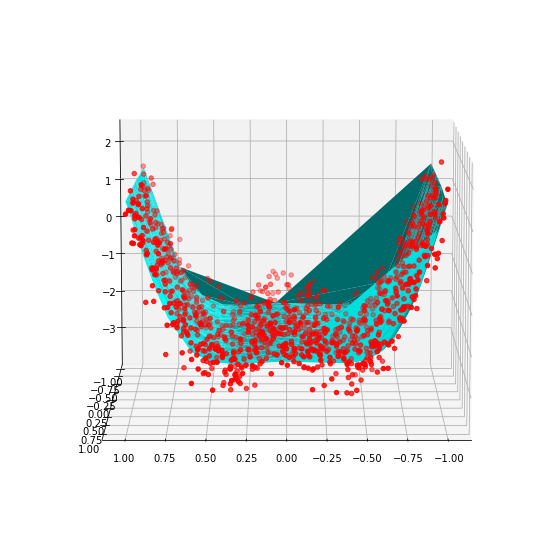

In [131]:
(X, Y) = datasize2(train2, 1); (Xdev, Ydev) = datasize2(dev2, 1)
(phidev, Ydev) = PHI(dev2, 14, 5, 1)
(wml, outputx) = regression2(train2, 14, 5, 1, 0.7)
outdev = phidev@wml
fig = plt.figure(figsize=(10,10))
    #print(np.sum((output-Y)**2))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Xdev[:,0] ,Xdev[:,1] ,Ydev,color='red')
    #print(np.shape(output2))
    # Creating plot
surf = ax.plot_trisurf(Xdev[:,0] ,Xdev[:,1], outdev,color='cyan')
ax.view_init(10, 90)
    # show plot
print(np.sum((outdev-Ydev)**2))
plt.show()